# Цифровой прорыв 2021
## FINTECH
___________________________________________________________________

## Кейс #budget10
### Команда DST-OFF

# Импорт библиотек

In [2]:
import numpy as np 
import pandas as pd 
pd.options.display.max_colwidth = 300

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

import re

RANDOM_SEED = 42
# !pip freeze > requirements.txt

# Загрузка данных

In [3]:
# Анализ содержимого таблицы
def df_types(df_input):
    df_output = pd.DataFrame(
        df_input[df_input[c].notna()][c].apply(type).value_counts() for c in df_input.columns
    ).fillna(0).astype(int)
    if df_input.isna().any().any():
        df_output['NaN'] = df_input.isna().sum()
    df_output['sum'] = df_output.sum(axis=1)
    display(df_output.head(60))
#     return df_output

In [4]:
df_input = pd.read_excel('Исходные.xlsx')
df_types(df_input)
df_input.columns

,<class 'str'>,<class 'int'>,<class 'float'>,NaN,sum
Источник,75,0,0,0,75
Период,0,75,0,0,75
Тип,75,0,0,0,75
1,0,0,75,0,75
3,0,0,75,0,75
4,0,0,75,0,75
6,0,75,0,0,75
7,0,0,75,0,75
10,0,0,75,0,75
12,0,0,75,0,75


Index(['Источник',   'Период',      'Тип',          1,          3,          4,
                6,          7,         10,         12,         13,         15,
               17,         18,         20,         21,         22,         25,
               28,         29,         32,         33,         35,         36,
               37,         40,         42,         43,         44,         45,
               46,         47,         48,         49,         50,         51,
               52,         53,         54,         55,         59,         60,
               61,         62,         64,         65,         66,         67,
               68,         69,      '101',      '103',      '105',      '106',
            '107',      '108',      '109',      '111',      '112',      '113',
            '114',      '115',      '116',      '117',      '100',     'р_01',
           'р_02',     'р_03',     'р_04',     'р_05',     'р_06',     'р_07',
           'р_08',     'р_09',     'р_10',     'р_11

In [24]:
df_headers = pd.read_excel('Заголовки.xlsx')
df_headers.head(47).set_index('пп')

,Наименование
пп,
1,Численность постоянного населения (среднегодовая)
3,декабрь к декабрю
4,в среднем за год
6,в основных ценах соответствующих лет
7,в сопоставимых ценах
10,Индекс промышленного производства (В+С+D+E)
12,по разделу В: Добыча полезных ископаемых
13,по разделу С: Обрабатывающие производства
15,производство пищевых продуктов


In [22]:
df_headers.tail(28).set_index('пп')

,Наименование
пп,
101,"Налоги на прибыль, доходы"
103,"Налоги на товары (работы, услуги), реализуемые на территории Российской Федерации"
105,Налоги на совокупный доход
106,Налоги на имущество
107,"Налоги, сборы и регулярные платежи за пользование природными ресурсами"
108,Государственная пошлина
109,"Задолженность и перерасчеты по отмененным налогам, сборам и иным обязательным платежам"
111,"Доходы от использования имущества, находящегося в государственной и муниципальной собственности"
112,Платежи при пользовании природными ресурсами


# Анализ

In [5]:
df_input

,Источник,Период,Тип,1,3,4,6,7,10,12,...,р_04,р_05,р_06,р_07,р_08,р_09,р_10,р_11,р_12,р_ит
0,СЭР_10_12,2010,базовый,684.0,111.0,113.5,125000,98.0,98.0,100.0,...,3152.465357,2532.392114,4.617704,7557.595415,1174.108206,5526.262891,7073.166831,1126.533200,0.000000,32339.620917
1,СЭР_10_12,2010,целевой,684.6,110.0,112.0,130820,100.0,101.0,104.0,...,3152.465357,2532.392114,4.617704,7557.595415,1174.108206,5526.262891,7073.166831,1126.533200,0.000000,32339.620917
2,СЭР_10_12,2011,базовый,681.7,109.0,111.5,135000,100.0,100.0,102.5,...,3690.906881,2523.465317,16.324490,8822.779068,1056.219459,8204.820316,7109.163302,261.637142,123.551864,35533.249552
3,СЭР_10_12,2011,целевой,683.1,108.0,110.0,148220,102.5,102.5,106.0,...,3690.906881,2523.465317,16.324490,8822.779068,1056.219459,8204.820316,7109.163302,261.637142,123.551864,35533.249552
4,СЭР_10_12,2012,базовый,679.8,108.0,108.5,146000,101.0,101.5,104.5,...,5642.748002,1991.891497,21.924314,10272.029867,966.436504,5612.694209,7280.987018,250.760205,95.272867,34769.400566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,СЭР_20_22,2021,целевой,609.7,103.7,103.4,322300,102.5,103.8,101.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,СЭР_20_22,2021,конс,609.0,103.7,103.4,309200,100.5,101.3,100.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,СЭР_20_22,2022,базовый,606.4,103.7,103.2,332500,102.0,102.8,101.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,СЭР_20_22,2022,целевой,607.0,103.7,103.2,345200,103.0,104.0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df_input[df_input['Тип']=='базовый'][list(df_input.columns)[3:]+['Период']]
df

,1,3,4,6,7,10,12,13,15,17,...,р_05,р_06,р_07,р_08,р_09,р_10,р_11,р_12,р_ит,Период
0,684.0,111.00,113.5,125000,98.0,98.0,100.0,98.0,100.0,102.000000,...,2532.392114,4.617704,7557.595415,1174.108206,5526.262891,7073.166831,1126.533200,0.000000,32339.620917,2010
2,681.7,109.00,111.5,135000,100.0,100.0,102.5,99.0,101.5,102.000000,...,2523.465317,16.324490,8822.779068,1056.219459,8204.820316,7109.163302,261.637142,123.551864,35533.249552,2011
4,679.8,108.00,108.5,146000,101.0,101.5,104.5,101.5,102.0,110.000000,...,1991.891497,21.924314,10272.029867,966.436504,5612.694209,7280.987018,250.760205,95.272867,34769.400566,2012
6,680.5,106.50,107.0,118500,100.0,100.0,96.0,101.5,100.5,105.000000,...,2523.465317,16.324490,8822.779068,1056.219459,8204.820316,7109.163302,261.637142,123.551864,35533.249552,2011
8,679.0,106.00,106.0,127000,101.5,101.5,102.0,101.0,102.0,104.000000,...,1991.891497,21.924314,10272.029867,966.436504,5612.694209,7280.987018,250.760205,95.272867,34769.400566,2012
10,677.7,105.00,105.5,136200,102.0,102.0,102.5,102.5,104.0,110.000000,...,1940.040202,20.252601,10984.997637,1152.551145,5019.651967,7410.412232,399.301104,98.799712,35502.839971,2013
12,639.0,107.25,107.5,159000,102.0,101.8,102.0,102.0,91.0,103.000000,...,1991.891497,21.924314,10272.029867,966.436504,5612.694209,7280.987018,250.760205,95.272867,34769.400566,2012
14,636.0,106.25,106.5,173500,102.5,102.0,103.0,102.5,101.0,106.000000,...,1940.040202,20.252601,10984.997637,1152.551145,5019.651967,7410.412232,399.301104,98.799712,35502.839971,2013
16,633.5,105.75,105.5,190000,104.0,102.8,103.0,103.0,102.0,108.000000,...,1818.107488,31.497077,11215.625787,1300.979283,6006.387378,7454.959711,306.213490,76.615010,36655.659576,2014
18,636.1,105.50,107.0,163000,102.5,101.5,101.5,101.0,101.0,106.000000,...,1940.040202,20.252601,10984.997637,1152.551145,5019.651967,7410.412232,399.301104,98.799712,35502.839971,2013


# Выявление корреляции между параметрами

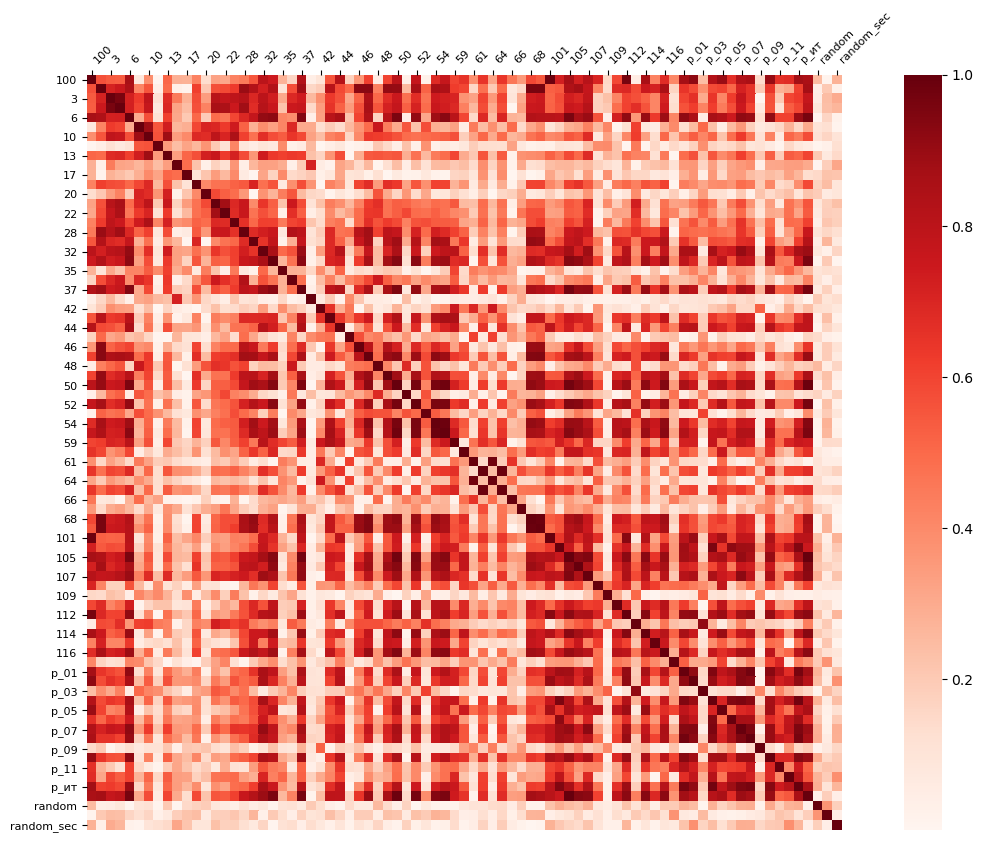

In [12]:
df = df.copy().reset_index(drop=True)
key_param = '100' # Доходы

# Для понимания значимости зависимости сгенерируем три случайные параметра
df['random'] = np.random.rand(len(df))
df['random_10'] = np.random.rand(len(df))*10000
df['random_sec'] = list(range(len(df)))
df['random_sec'] = df['random_sec'].sample(frac=1).reset_index(drop=True)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False

plt.figure(figsize=(16,10), dpi= 100)

df_corr = df[[key_param]+[c for c in df.columns if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), cmap='Reds', square=True)

plt.xticks(horizontalalignment='left', fontsize=8, rotation=45)
plt.yticks(fontsize=8);

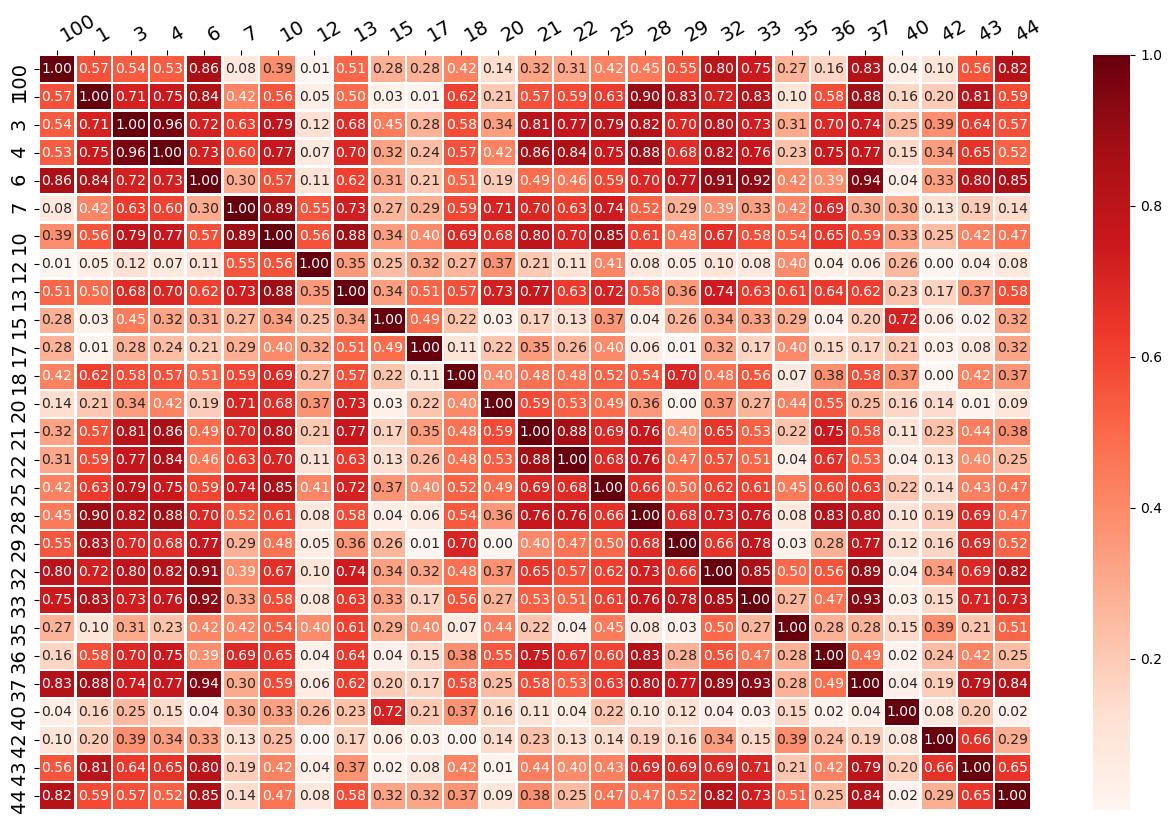

In [14]:
plt.figure(figsize=(16,10), dpi= 100)
df_corr = df[[key_param]+[c for c in df.columns[:len(df.columns)//3] if not c in [key_param]]].corr()
sns.heatmap(df_corr.abs(), annot=True, fmt='.2f', annot_kws={'fontsize':10}, cmap='Reds', linewidths=1)
#, mask=np.triu(df_corr)) colors — https://matplotlib.org/examples/color/colormaps_reference.html
plt.xticks(horizontalalignment='left', fontweight='light', fontsize=10, rotation=30)
plt.yticks(fontweight='light', fontsize=10);